In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from src.recalibration import *
from src.metrics import plot_calibration_curve

In [9]:
graphics_format = ".png"
graphics_path = "/Users/christopher/Documents/University/Master/BEAR Confidence Estimation In LMs/Thesis/Graphics/"

In [10]:
instance_lvl_results = pd.read_json(
    "../results/instance_level_results.json",
    orient="records",
    lines=True)

### Table 5.6: Comparison of ACE and brier score for isotonic regression and histogram binning

In [11]:
# Isotonic Regression
preds_iso, metrics_iso = recalibrate_lms(
    data=instance_lvl_results,
    model_names=instance_lvl_results["model"].unique(),
    method="isotonic"
)
metrics_iso.drop(columns=["method"]).set_index("model").round(4)

,brier_score_margin,brier_score,ACE,ACE_margin
model,,,,
opt-350m,0.1773,0.1456,0.0324,0.1374
opt-125m,0.1852,0.1364,0.0251,0.1528
xlm-roberta-large,0.3537,0.1169,0.0276,0.4035
gpt2-medium,0.1815,0.1468,0.0317,0.1232
roberta-large,0.2754,0.1491,0.0310,0.2868
opt-6.7b,0.1706,0.1629,0.0338,0.0693
roberta-base,0.2869,0.1331,0.0308,0.3185
gemma-2b,0.1547,0.1459,0.0349,0.0586
xlm-roberta-base,0.3645,0.1077,0.0257,0.4256


In [12]:
# Histogram Binning
preds_hb, metrics_hb = recalibrate_lms(
    data=instance_lvl_results,
    model_names=instance_lvl_results["model"].unique(),
    method="histogram"
)
metrics_hb.drop(columns=["method"]).set_index("model").round(4)

,brier_score_margin,brier_score,ACE,ACE_margin
model,,,,
opt-350m,0.1773,0.1469,0.0467,0.1374
opt-125m,0.1852,0.1354,0.0263,0.1528
xlm-roberta-large,0.3537,0.1187,0.0321,0.4035
gpt2-medium,0.1815,0.1478,0.0268,0.1232
roberta-large,0.2754,0.1502,0.0356,0.2868
opt-6.7b,0.1706,0.1634,0.0359,0.0693
roberta-base,0.2869,0.1337,0.0300,0.3185
gemma-2b,0.1547,0.1461,0.0337,0.0586
xlm-roberta-base,0.3645,0.1087,0.0358,0.4256


In [13]:
models = ["gpt2-medium", "opt-1.3b", "gemma-2b",
          "bert-base-cased", "roberta-base", "xlm-roberta-base"]

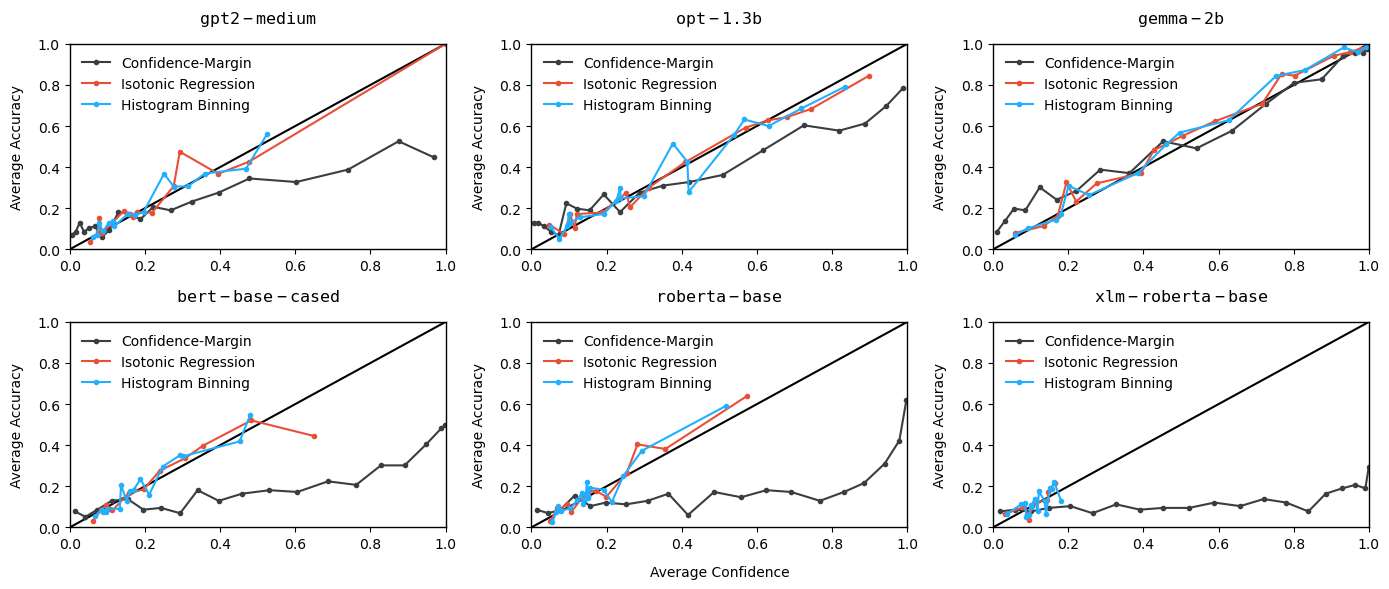

In [14]:
_, axes = plt.subplots(2, 3, figsize=(14, 6), facecolor="white", sharey=True)
axes = axes.flatten()
for j, model in enumerate(models):
    iso = preds_iso[preds_iso["model"] == model]
    hb = preds_hb[preds_hb["model"] == model]
    
    plot_calibration_curve(
        title=rf"$\mathtt{{{model}}}$",
        predictions=[iso["true_label"].tolist()]*3,
        confidences=[iso["margin_confidence"].tolist(),
                     iso["calibrated_confidence"].tolist(),
                     hb["calibrated_confidence"].tolist()],
        labels=["Confidence-Margin", "Isotonic Regression", "Histogram Binning"],
        colors=["#393e41", "#e94f37", "#21b0fe"],
        markers=["."]*3,
        linestyles=["solid"]*3,
        axis=axes[j]
    )
    axes[j].set_xlabel("Average Confidence") if j==4 else axes[j].set_xlabel("")

plt.tight_layout()
plt.savefig(graphics_path + "calibration_curves_recalibrated" + graphics_format, dpi=600)
plt.show()